In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
train_df = pd.read_csv('carInsurance_train.csv')

In [7]:
test_df = pd.read_csv('carInsurance_test.csv')

In [8]:
train_df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


In [258]:
result = train_df['CarInsurance'].value_counts()

In [259]:
import matplotlib.pyplot as plt
import seaborn  as sns

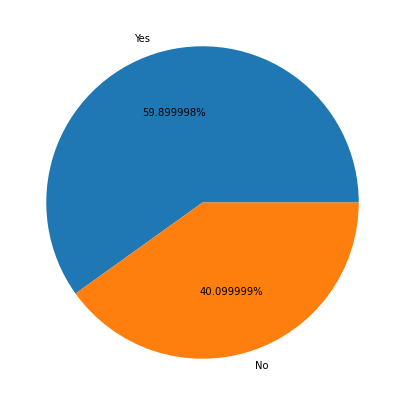

In [265]:
plt.figure(figsize = (7,8))
plt.pie(result,autopct = '%2f%%',labels = ('Yes','No'))
plt.show()

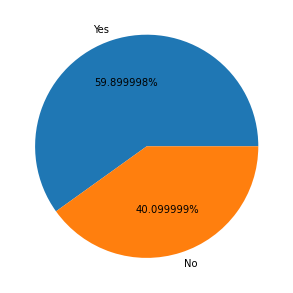

In [266]:
plt.figure(figsize = (5,6))
plt.pie(result,autopct = '%2f%%',labels = ['Yes','No'])
plt.show()

In [9]:
test_df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4996,31,admin.,single,secondary,0,131,1,0,cellular,15,jun,1,-1,0,NaN,13:54:24,13:56:55,NaN
996,4997,52,management,married,tertiary,0,2635,0,0,cellular,6,sep,1,108,8,success,13:13:38,13:18:51,NaN
997,4998,46,technician,married,tertiary,0,3009,0,0,cellular,4,aug,2,-1,0,NaN,10:23:35,10:24:33,NaN
998,4999,60,retired,married,secondary,0,7038,0,0,telephone,7,oct,4,-1,0,NaN,17:01:49,17:04:07,NaN


In [10]:
train_df.isna().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [210]:
from sklearn.preprocessing import StandardScaler

In [211]:
scaler = StandardScaler()

In [215]:
def preprocessing_inputs(df):
    df = df.copy()
    # Id columns remove
    df = df.drop(['Id'],axis = 'columns')
    # more than 0.75 isna value remove
    df = df.drop(['Outcome'],axis = 'columns')
    ## Fill categorical missing values with column modes
    for column in ['Job','Education','Communication']:
        df[column] =  df[column].fillna(df[column].mode()[0])
    # binary columns encode
    df['Communication'] = df['Communication'].replace({'telephone': 0,'cellular': 1})
    # ordinary encode
    df['Education'] = df['Education'].replace({'primary':0,'secondary':1,'tertiary':2})
    df['Marital'] = df['Marital'].replace({'divorced': 1,'single':0,'married':2})
    # time encoding
    df['Call_Duration'] = (pd.to_datetime(df['CallEnd']) - pd.to_datetime(df['CallStart']))
    df['Call_Duration'] = df['Call_Duration'].apply(lambda x: x.seconds)
    # drop CallEnd,CallStart
    df = df.drop(['CallEnd','CallStart'],axis = 'columns')
    # df one hot encode
    df = pd.get_dummies(df,drop_first = True)
    # split df into X,y
    y = df['CarInsurance']
    X = df.drop(['CarInsurance'],axis = 'columns')
    # train X,y
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train),index = X_train.index,columns = X_train.columns)
    X_test  = pd.DataFrame(scaler.transform(X_test),index = X_test.index,columns = X_test.columns)
    return X_train,X_test,y_train,y_test

In [216]:
 X_train,X_test,y_train,y_test = preprocessing_inputs(train_df)

In [217]:
X_train

,Age,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Call_Duration,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,LastContactMonth_aug,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep
3924,-1.051795,-0.305504,-0.272650,-0.129775,-0.438535,1.018292,-0.384417,0.27038,-0.321959,0.125794,-0.460131,-0.345669,2.677720,-0.476932,-0.181451,-0.163181,-0.542195,-0.258887,-0.190445,3.300895,-0.185094,-0.450062,-0.184189,-0.393469,-0.097282,-0.267037,-0.186893,-0.411814,-0.352683,-0.137054,1.672114,-0.310267,-0.172049,-0.158063
58,-0.621161,-1.418959,-0.272650,-0.129775,1.262686,1.018292,-0.384417,0.27038,0.267642,-0.518786,-0.460131,-0.345669,0.746621,-0.476932,-0.181451,-0.163181,1.844356,-0.258887,-0.190445,-0.302948,-0.185094,-0.450062,-0.184189,-0.393469,-0.097282,-0.267037,-0.186893,-0.411814,-0.352683,-0.137054,1.672114,-0.310267,-0.172049,-0.158063
3855,0.067852,0.807951,-1.792652,7.705671,-0.600744,1.018292,-0.384417,0.27038,-0.321959,-0.518786,3.016887,0.680912,-0.376716,-0.476932,-0.181451,-0.163181,-0.542195,-0.258887,-0.190445,-0.302948,-0.185094,-0.450062,5.429198,-0.393469,-0.097282,-0.267037,-0.186893,-0.411814,-0.352683,-0.137054,1.672114,-0.310267,-0.172049,-0.158063
3373,-0.621161,-0.305504,1.247351,-0.129775,-0.436557,-0.982036,-0.384417,0.27038,0.621402,-0.196496,-0.460131,-0.345669,-0.669131,-0.476932,-0.181451,-0.163181,1.844356,-0.258887,-0.190445,-0.302948,-0.185094,-0.450062,-0.184189,2.541497,-0.097282,-0.267037,-0.186893,-0.411814,-0.352683,-0.137054,-0.598045,-0.310267,-0.172049,-0.158063
383,-0.535035,0.807951,-0.272650,-0.129775,-0.366190,-0.982036,-0.384417,0.27038,0.621402,1.737244,-0.460131,-0.345669,-0.431725,-0.476932,-0.181451,-0.163181,-0.542195,-0.258887,-0.190445,-0.302948,-0.185094,2.221918,-0.184189,2.541497,-0.097282,-0.267037,-0.186893,-0.411814,-0.352683,-0.137054,-0.598045,-0.310267,-0.172049,-0.158063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.621161,0.807951,1.247351,-0.129775,-0.436557,1.018292,-0.384417,0.27038,-0.675719,-0.518786,-0.460131,-0.345669,-0.750197,-0.476932,-0.181451,-0.163181,-0.542195,-0.258887,5.250850,-0.302948,-0.185094,-0.450062,-0.184189,-0.393469,-0.097282,-0.267037,-0.186893,2.428282,-0.352683,-0.137054,-0.598045,-0.310267,-0.172049,-0.158063
2411,0.842991,0.807951,-1.792652,-0.129775,-0.417623,-0.982036,-0.384417,0.27038,0.267642,-0.518786,-0.460131,-0.345669,1.392251,-0.476932,-0.181451,-0.163181,-0.542195,3.862693,-0.190445,-0.302948,-0.185094,-0.450062,-0.184189,-0.393469,-0.097282,-0.267037,-0.186893,-0.411814,2.835410,-0.137054,-0.598045,-0.310267,-0.172049,-0.158063
422,1.962638,0.807951,-0.272650,-0.129775,0.389468,-0.982036,-0.384417,0.27038,-0.439879,-0.518786,-0.460131,-0.345669,-0.677817,-0.476932,-0.181451,-0.163181,-0.542195,3.862693,-0.190445,-0.302948,-0.185094,-0.450062,-0.184189,-0.393469,-0.097282,-0.267037,-0.186893,-0.411814,-0.352683,7.296389,-0.598045,-0.310267,-0.172049,-0.158063
446,-0.018275,-1.418959,-0.272650,-0.129775,-0.388798,1.018292,-0.384417,0.27038,-0.439879,-0.196496,-0.460131,-0.345669,-0.689398,-0.476932,-0.181451,-0.163181,-0.542195,-0.258887,-0.190445,-0.302948,-0.185094,2.221918,-0.184189,-0.393469,-0.097282,-0.267037,-0.186893,-0.411814,-0.352683,-0.137054,1.672114,-0.310267,-0.172049,-0.158063


In [218]:
X_test

,Age,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Call_Duration,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,LastContactMonth_aug,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep
1591,-0.965668,0.807951,-0.272650,-0.129775,0.032551,1.018292,-0.384417,0.27038,1.682684,-0.518786,-0.460131,-0.345669,-0.341974,-0.476932,-0.181451,-0.163181,-0.542195,-0.258887,-0.190445,-0.302948,-0.185094,2.221918,-0.184189,-0.393469,-0.097282,-0.267037,-0.186893,-0.411814,-0.352683,-0.137054,-0.598045,-0.310267,-0.172049,-0.158063
1142,-1.654681,-1.418959,-0.272650,-0.129775,-0.402645,-0.982036,-0.384417,0.27038,-1.029480,0.770374,-0.460131,-0.345669,-0.315917,-0.476932,-0.181451,-0.163181,-0.542195,-0.258887,-0.190445,-0.302948,5.402655,-0.450062,-0.184189,-0.393469,10.279429,-0.267037,-0.186893,-0.411814,-0.352683,-0.137054,-0.598045,-0.310267,-0.172049,-0.158063
2839,0.584611,-1.418959,-0.272650,-0.129775,-0.436557,-0.982036,-0.384417,0.27038,0.267642,-0.518786,-0.460131,-0.345669,0.286285,-0.476932,-0.181451,-0.163181,-0.542195,-0.258887,5.250850,-0.302948,-0.185094,-0.450062,-0.184189,-0.393469,-0.097282,-0.267037,-0.186893,-0.411814,2.835410,-0.137054,-0.598045,-0.310267,-0.172049,-0.158063
1060,-0.448908,0.807951,-0.272650,-0.129775,1.340964,1.018292,-0.384417,0.27038,-1.501161,5.604723,-0.460131,-0.345669,-0.970232,2.096733,-0.181451,-0.163181,-0.542195,-0.258887,-0.190445,-0.302948,-0.185094,-0.450062,-0.184189,-0.393469,-0.097282,-0.267037,-0.186893,-0.411814,2.835410,-0.137054,-0.598045,-0.310267,-0.172049,-0.158063
3231,-0.793415,-0.305504,-0.272650,-0.129775,-0.234784,-0.982036,-0.384417,0.27038,-1.619081,-0.518786,-0.460131,-0.345669,-0.385402,-0.476932,-0.181451,-0.163181,-0.542195,-0.258887,-0.190445,-0.302948,-0.185094,-0.450062,-0.184189,-0.393469,-0.097282,3.744793,-0.186893,-0.411814,-0.352683,-0.137054,-0.598045,-0.310267,-0.172049,-0.158063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,-0.707288,-1.418959,1.247351,-0.129775,-0.250609,1.018292,-0.384417,0.27038,0.621402,-0.518786,1.498620,0.167621,-0.136415,-0.476932,-0.181451,-0.163181,-0.542195,-0.258887,5.250850,-0.302948,-0.185094,-0.450062,-0.184189,-0.393469,-0.097282,-0.267037,-0.186893,-0.411814,-0.352683,-0.137054,-0.598045,-0.310267,5.812281,-0.158063
1189,-0.190528,-0.305504,1.247351,7.705671,-0.435709,-0.982036,-0.384417,0.27038,-1.147400,-0.518786,-0.460131,-0.345669,0.387617,-0.476932,-0.181451,-0.163181,-0.542195,-0.258887,-0.190445,-0.302948,-0.185094,2.221918,-0.184189,-0.393469,-0.097282,-0.267037,-0.186893,-0.411814,-0.352683,-0.137054,1.672114,-0.310267,-0.172049,-0.158063
2330,-0.535035,0.807951,1.247351,-0.129775,-0.385124,-0.982036,2.601344,0.27038,-1.265320,-0.518786,-0.460131,-0.345669,0.072040,-0.476932,-0.181451,-0.163181,-0.542195,-0.258887,5.250850,-0.302948,-0.185094,-0.450062,-0.184189,-0.393469,-0.097282,-0.267037,-0.186893,-0.411814,2.835410,-0.137054,-0.598045,-0.310267,-0.172049,-0.158063
3612,0.670738,0.807951,-0.272650,-0.129775,0.583045,1.018292,-0.384417,0.27038,1.682684,-0.518786,1.123740,0.167621,-0.295651,-0.476932,-0.181451,-0.163181,-0.542195,-0.258887,-0.190445,-0.302948,-0.185094,-0.450062,-0.184189,-0.393469,-0.097282,-0.267037,-0.186893,-0.411814,-0.352683,-0.137054,-0.598045,-0.310267,-0.172049,-0.158063


In [219]:
y_train

3924    1
58      1
3855    0
3373    0
383     0
       ..
772     0
2411    1
422     0
446     0
1260    0
Name: CarInsurance, Length: 3200, dtype: int64

In [220]:
y_test

1591    0
1142    0
2839    0
1060    0
3231    0
       ..
1324    1
1189    1
2330    0
3612    1
21      1
Name: CarInsurance, Length: 800, dtype: int64

In [223]:
X_train.describe()

,Age,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Call_Duration,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,LastContactMonth_aug,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep
count,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03,3.200000e+03
mean,9.409140e-17,-7.212980e-17,4.070702e-16,2.359224e-16,1.183081e-17,1.539047e-16,8.276713e-16,-2.386980e-17,-1.393677e-16,3.738503e-16,-2.908437e-16,-2.360959e-16,-3.032297e-17,1.402004e-16,-4.345309e-16,1.295023e-15,-2.436940e-16,-4.287196e-16,-3.808065e-16,2.987888e-16,-1.221072e-16,3.037501e-17,-4.718448e-18,4.821490e-16,-5.987138e-16,-3.308118e-16,-2.612494e-16,-3.046868e-16,-6.970119e-17,-1.974809e-16,3.376466e-16,-1.763867e-16,-9.546183e-17,1.896226e-16
std,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00,1.000156e+00
min,-1.999188e+00,-1.418959e+00,-1.792652e+00,-1.297746e-01,-1.300731e+00,-9.820363e-01,-3.844167e-01,-3.698500e+00,-1.737001e+00,-5.187861e-01,-4.601308e-01,-3.456689e-01,-1.010765e+00,-4.769324e-01,-1.814510e-01,-1.631814e-01,-5.421945e-01,-2.588867e-01,-1.904453e-01,-3.029481e-01,-1.850942e-01,-4.500616e-01,-1.841893e-01,-3.934689e-01,-9.728167e-02,-2.670375e-01,-1.868926e-01,-4.118138e-01,-3.526827e-01,-1.370541e-01,-5.980452e-01,-3.102674e-01,-1.720495e-01,-1.580632e-01
25%,-7.934147e-01,-1.418959e+00,-2.726503e-01,-1.297746e-01,-4.071667e-01,-9.820363e-01,-3.844167e-01,2.703799e-01,-9.115598e-01,-5.187861e-01,-4.601308e-01,-3.456689e-01,-6.546554e-01,-4.769324e-01,-1.814510e-01,-1.631814e-01,-5.421945e-01,-2.588867e-01,-1.904453e-01,-3.029481e-01,-1.850942e-01,-4.500616e-01,-1.841893e-01,-3.934689e-01,-9.728167e-02,-2.670375e-01,-1.868926e-01,-4.118138e-01,-3.526827e-01,-1.370541e-01,-5.980452e-01,-3.102674e-01,-1.720495e-01,-1.580632e-01
50%,-1.905283e-01,8.079508e-01,-2.726503e-01,-1.297746e-01,-2.798578e-01,-9.820363e-01,-3.844167e-01,2.703799e-01,3.180160e-02,-1.964962e-01,-4.601308e-01,-3.456689e-01,-3.477642e-01,-4.769324e-01,-1.814510e-01,-1.631814e-01,-5.421945e-01,-2.588867e-01,-1.904453e-01,-3.029481e-01,-1.850942e-01,-4.500616e-01,-1.841893e-01,-3.934689e-01,-9.728167e-02,-2.670375e-01,-1.868926e-01,-4.118138e-01,-3.526827e-01,-1.370541e-01,-5.980452e-01,-3.102674e-01,-1.720495e-01,-1.580632e-01
75%,6.707381e-01,8.079508e-01,1.247351e+00,-1.297746e-01,2.513256e-02,1.018292e+00,-3.844167e-01,2.703799e-01,7.393227e-01,1.257938e-01,-4.601308e-01,-3.456689e-01,3.239222e-01,-4.769324e-01,-1.814510e-01,-1.631814e-01,-5.421945e-01,-2.588867e-01,-1.904453e-01,-3.029481e-01,-1.850942e-01,-4.500616e-01,-1.841893e-01,-3.934689e-01,-9.728167e-02,-2.670375e-01,-1.868926e-01,-4.118138e-01,-3.526827e-01,-1.370541e-01,1.672114e+00,-3.102674e-01,-1.720495e-01,-1.580632e-01
max,4.632563e+00,8.079508e-01,1.247351e+00,7.705671e+00,2.737557e+01,1.018292e+00,2.601344e+00,2.703799e-01,1.800604e+00,1.301739e+01,7.552942e+00,2.942516e+01,8.392845e+00,2.096733e+00,5.511130e+00,6.128150e+00,1.84

In [231]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [232]:
models = {
     'Linear_Regression'     :  LinearRegression(),
     'Logistic_Regression'   :LogisticRegression(),
     'Ridge'                 :Ridge(),
    'Lasso'                  :Lasso(),
    'LinearSVC'              :LinearSVC(),
    'SVC'                    :SVC(),
    'Decision_Tree'          :DecisionTreeClassifier(),
    'Random_forest'          :RandomForestClassifier(),
    'GNB'                    :GaussianNB()

}
for name, model in models.items():
    model.fit(X_train,y_train)
    print(name + 'Tranned')
             

Linear_RegressionTranned
Logistic_RegressionTranned
RidgeTranned
LassoTranned


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVCTranned
SVCTranned
Decision_TreeTranned
Random_forestTranned
GNBTranned


In [235]:
for name,model in models.items():
    print(name + ' Accuracy: {:2f}'.format(model.score(X_test,y_test)))

Linear_Regression Accuracy: 0.406654
Logistic_Regression Accuracy: 0.813750
Ridge Accuracy: 0.406647
Lasso Accuracy: -0.002264
LinearSVC Accuracy: 0.815000
SVC Accuracy: 0.830000
Decision_Tree Accuracy: 0.766250
Random_forest Accuracy: 0.842500
GNB Accuracy: 0.740000


In [236]:
from sklearn.model_selection import cross_val_score

In [237]:
cross_val_score(SVC(),X_test,y_test,cv =5)

array([0.80625, 0.78125, 0.80625, 0.8125 , 0.8125 ])

In [238]:
cross_val_score(SVC(gamma = 'auto',C =100,kernel  = 'linear'),X_test,y_test,cv =5)

array([0.8625 , 0.7625 , 0.79375, 0.81875, 0.825  ])